# Map Thing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
df = pd.read_csv('kc_house_data.csv')

In [4]:
df['house_age'] = df.yr_built.map(lambda x: 2015 - x)
df_new = df.loc[df['house_age'] < 25]
df_new.shape

(6671, 22)

In [5]:
df_new_groupby = df_new.groupby('zipcode').mean()

df_new_groupby

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age
zipcode,,,,,,,,,,,,,,,,,,,
98001,4.899669e+09,3.327384e+05,3.676923,2.519231,2273.369231,10557.069231,1.888462,0.000000,0.062016,3.015385,7.830769,2235.138462,2004.569231,0.000000,47.305188,-122.267954,2174.638462,9195.169231,10.430769
98002,4.468321e+09,2.775648e+05,3.540000,2.520000,1926.300000,5579.440000,1.780000,0.000000,0.040000,3.000000,7.140000,1854.300000,2005.820000,0.000000,47.325474,-122.212360,1903.020000,6325.760000,9.180000
98003,4.943730e+09,3.483744e+05,3.542373,2.491525,2314.288136,9491.084746,1.822034,0.000000,0.050847,3.016949,8.016949,2236.576271,1998.440678,0.000000,47.291966,-122.297661,2159.796610,8496.101695,16.559322
98004,4.138027e+09,1.899986e+06,4.192308,3.458333,3981.282051,11451.000000,1.961538,0.000000,0.333333,3.012821,10.205128,3576.153846,2005.846154,0.000000,47.614241,-122.203192,2732.435897,11333.743590,9.153846
98005,4.690646e+09,1.131530e+06,3.666667,3.300000,3366.200000,20811.666667,1.933333,0.000000,0.000000,3.066667,9.466667,3056.200000,2000.466667,0.000000,47.611873,-122.160000,2972.000000,17149.000000,14.533333
98006,4.217042e+09,1.128597e+06,4.132353,3.233456,3912.014706,14382.882353,1.889706,0.000000,0.963235,3.044118,10.080882,3305.397059,1999.588235,0.000000,47.552661,-122.131588,3578.169118,13079.941176,15.411765
98007,2.923673e+09,8.434000e+05,3.571429,2.875000,2835.000000,7395.642857,2.107143,0.000000,0.142857,3.000000,9.571429,2748.571429,1999.428571,0.000000,47.614971,-122.142357,2631.428571,6903.000000,15.571429
98008,7.164728e+09,1.765586e+06,3.636364,3.000000,4206.363636,13161.090909,2.000000,0.400000,2.090909,3.000000,9.727273,3469.090909,2002.090909,0.000000,47.602755,-122.109364,2929.090909,11820.000000,12.909091
98010,4.058839e+09,5.076632e+05,3.565217,2.521739,2653.130435,85390.326087,1.782609,0.000000,0.152174,3.130435,8.326087,2598.130435,2000.282609,0.000000,47.333807,-121.996674,2403.913043,65141.021739,14.717391


In [6]:
df_new_groupby.loc[:, ['lat', 'long']]

,lat,long
zipcode,,
98001,47.305188,-122.267954
98002,47.325474,-122.212360
98003,47.291966,-122.297661
98004,47.614241,-122.203192
98005,47.611873,-122.160000
98006,47.552661,-122.131588
98007,47.614971,-122.142357
98008,47.602755,-122.109364
98010,47.333807,-121.996674


In [7]:
df_new_groupby.reset_index(inplace = True)

In [9]:
final_df = df_new_groupby.loc[:, ['zipcode', 'lat', 'long']]

In [10]:
final_df

,zipcode,lat,long
0,98001,47.305188,-122.267954
1,98002,47.325474,-122.212360
2,98003,47.291966,-122.297661
3,98004,47.614241,-122.203192
4,98005,47.611873,-122.160000
5,98006,47.552661,-122.131588
6,98007,47.614971,-122.142357
7,98008,47.602755,-122.109364
8,98010,47.333807,-121.996674
9,98011,47.756227,-122.200644


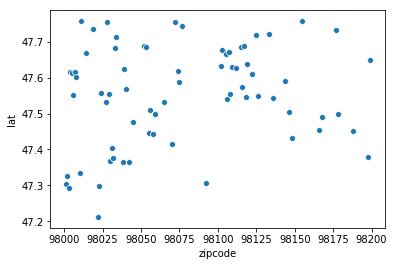

In [13]:
ax = sns.scatterplot(x = 'zipcode', y = 'lat', data = final_df)

In [16]:
king_county_map = gpd.read_file('ShapeFile/tl_2017_53033_roads.shp')
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(final_df['long'], final_df['lat'])]
geo_df = gpd.GeoDataFrame(final_df, crs = crs, geometry = geometry)

No handles with labels found to put in legend.


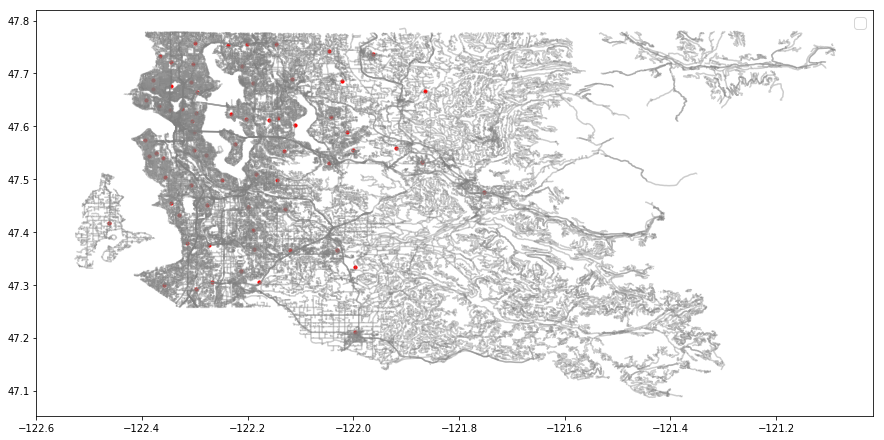

In [17]:
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = '')
plt.legend(prop = {'size': 15})

In [19]:
df_new_groupby.loc[:,['zipcode', 'lat', 'long']]

,zipcode,lat,long
0,98001,47.305188,-122.267954
1,98002,47.325474,-122.212360
2,98003,47.291966,-122.297661
3,98004,47.614241,-122.203192
4,98005,47.611873,-122.160000
5,98006,47.552661,-122.131588
6,98007,47.614971,-122.142357
7,98008,47.602755,-122.109364
8,98010,47.333807,-121.996674
9,98011,47.756227,-122.200644


In [30]:
df_25_map = df.loc[df['house_age'] < 25]
df_25_mapping = df_25_map.loc[:, ['lat', 'long']]
df_25_mapping

,lat,long
5,47.6561,-122.005
6,47.3097,-122.327
9,47.3684,-122.031
16,47.7277,-121.962
22,47.3266,-122.169
29,47.7073,-122.110
30,47.5391,-122.070
31,47.7274,-122.357
39,47.5301,-122.180
40,47.6145,-122.027


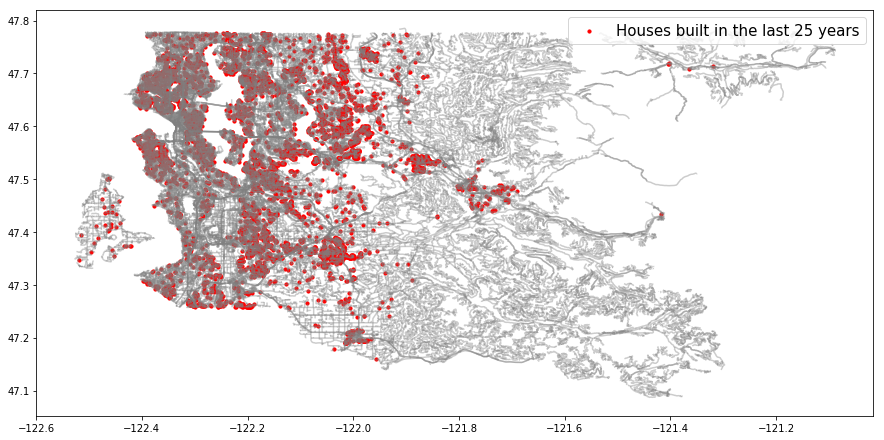

In [34]:
king_county_map = gpd.read_file('ShapeFile/tl_2017_53033_roads.shp')
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_25_mapping['long'], df_25_mapping['lat'])]
geo_df = gpd.GeoDataFrame(df_25_mapping, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Houses built in the last 25 years')
plt.legend(prop = {'size': 15})

(3080, 22)

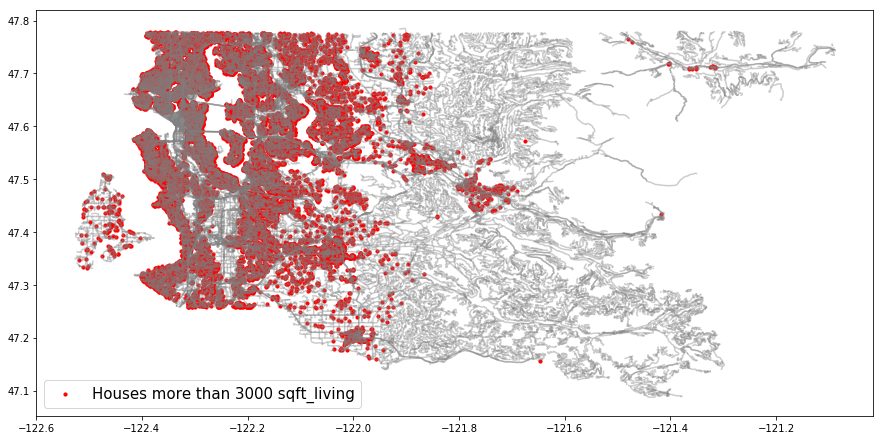

In [36]:
df_sqft_living = df.loc[df['sqft_living'] > 3000]
display(df_sqft_living.shape)
df_sqft_living_mapping = df.loc[:, ['lat', 'long']]
geometry = [Point(xy) for xy in zip(df_sqft_living_mapping['long'], df_sqft_living_mapping['lat'])]
geo_df = gpd.GeoDataFrame(df_sqft_living_mapping, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Houses more than 3000 sqft_living')
plt.legend(prop = {'size': 15})

In [ ]:
df_sqft_living = df.loc[df['sqft_living'] > 3000]
display(df_sqft_living.shape)
df_sqft_living_mapping = df.loc[:, ['lat', 'long']]
geometry = [Point(xy) for xy in zip(df_sqft_living_mapping['long'], df_sqft_living_mapping['lat'])]
geo_df = gpd.GeoDataFrame(df_sqft_living_mapping, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Houses more than 3000 sqft_living')
plt.legend(prop = {'size': 15})

(1175, 22)

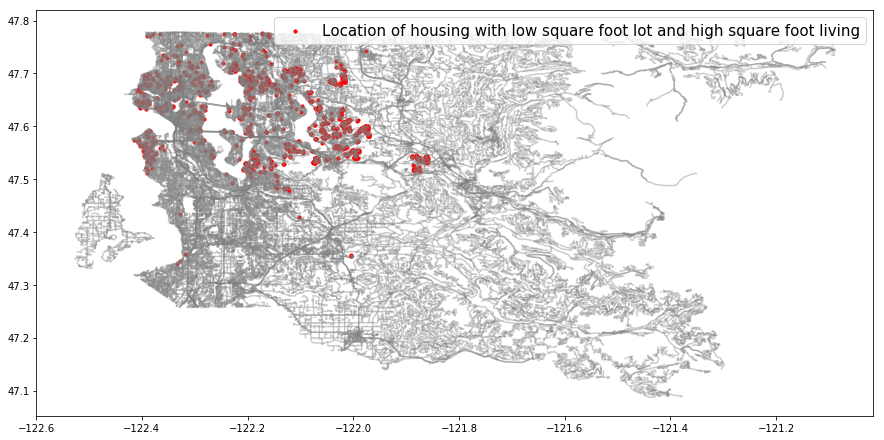

In [46]:
df_sara_map = df.loc[(df['sqft_living'] > 2400) & (df['sqft_lot'] < 10000) & (df['price'] > 600000) & (df['house_age'] < 25)]
display(df_sara_map.shape)
geometry = [Point(xy) for xy in zip(df_sara_map['long'], df_sara_map['lat'])]
geo_df = gpd.GeoDataFrame(df_sara_map, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Location of housing with low square foot lot and high square foot living')
plt.legend(prop = {'size': 15})
plt.savefig('Location of modern style housing', dpi=300, bbox_inches='tight')

(2406, 22)

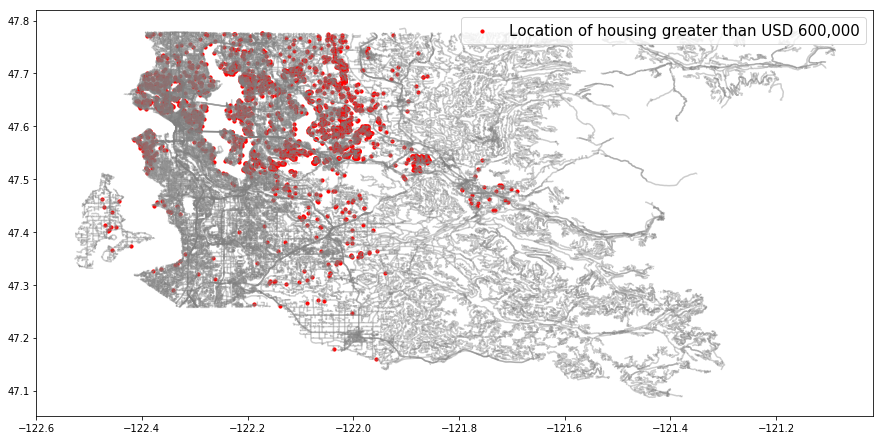

In [50]:
df_expensive = df.loc[(df['price'] > 600000) & (df['house_age'] < 25)]
display(df_expensive.shape)
geometry = [Point(xy) for xy in zip(df_expensive['long'], df_expensive['lat'])]
geo_df = gpd.GeoDataFrame(df_expensive, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Location of housing greater than USD 600,000')
plt.legend(prop = {'size': 15})

(553, 22)

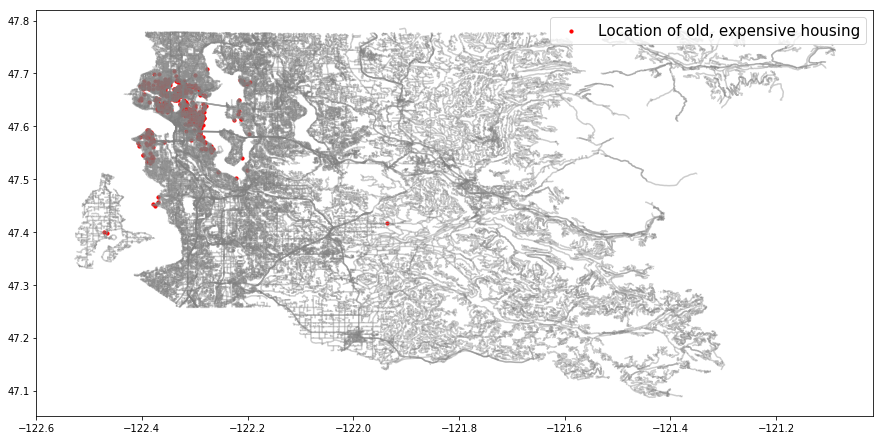

In [51]:
df_old = df.loc[(df['price'] > 600000) & (df['house_age'] > 95)]
display(df_old.shape)
geometry = [Point(xy) for xy in zip(df_old['long'], df_old['lat'])]
geo_df = gpd.GeoDataFrame(df_old, crs = crs, geometry = geometry)
fig, ax  = plt.subplots(figsize = (15,15))
king_county_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'Location of old, expensive housing')
plt.legend(prop = {'size': 15})